In [7]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

data/training/cam0/images/fly1_zip001_000000.jpg
Found image in cam0, loading annotations...
Frame index: 0
2
Image size: (480, 960)
Keypoint range: 0.0 to 0.875
Scaled keypoint range: 0.0 to 802.5


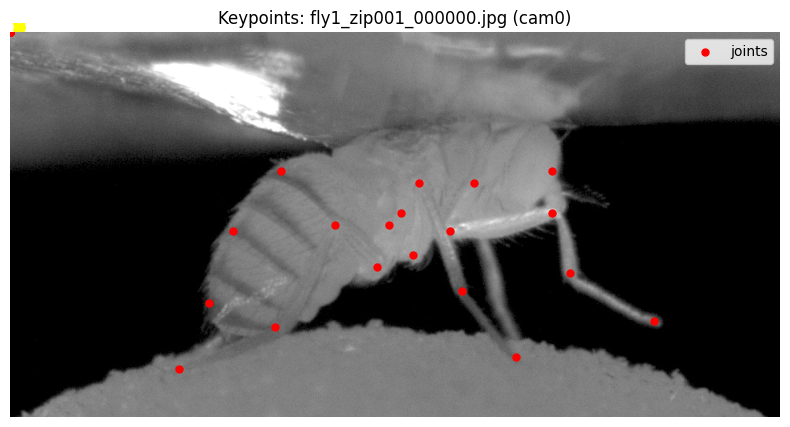

Image or annotation not found for: fly1_zip001_000000.jpg


In [36]:
# Configuration
target_base = Path("./data/training")  # Root folder where cam folders are
image_name = "fly1_zip001_000000.jpg"

# Search for the image in all camera folders
found = False
for cam_id in range(7):
    img_path = target_base / f"cam{cam_id}" / "images" / image_name
    ann_path = target_base / f"cam{cam_id}" / "annotations" / "annotations_ramses.npz"

    print(img_path)

    if img_path.exists() and ann_path.exists():
        print(f"Found image in cam{cam_id}, loading annotations...")

        # Load annotation data
        data = np.load(ann_path)
        points2d = data["points2d"]

        # Extract frame index from image name (last 6 digits)
        frame_index = int(image_name.split("_")[-1].split(".")[0])
        print(f"Frame index: {frame_index}")

        # Get keypoints
        try:
            keypoints = points2d[frame_index]
            print(keypoints.ndim)
        except IndexError:
            print(f"Frame {frame_index} not found in annotations.npz")
            continue

        # === PLOT ===
        plt.figure(figsize=(8, 6))
        image = plt.imread(img_path)
        h, w = image.shape

        scaled_keypoints = keypoints.copy()
        scaled_keypoints[:, 0] *= h
        scaled_keypoints[:, 1] *= w
        print("Image size:", image.shape)
        print("Keypoint range:", keypoints.min(), "to", keypoints.max())
        print("Scaled keypoint range:", scaled_keypoints.min(), "to", scaled_keypoints.max())
        plt.imshow(image, cmap="grey")
        plt.scatter(keypoints[:, 1] * w, keypoints[:, 0] * h, color='red', s=25, label='joints')
        for i, (x, y) in enumerate(keypoints):
            plt.text(x + 2, y - 2, str(i), fontsize=8, color='yellow')
        plt.title(f"Keypoints: {image_name} (cam{cam_id})")
        plt.axis('off')
        plt.legend()
        plt.tight_layout()
        plt.show()
        break

if not found:
    print(f"Image or annotation not found for: {image_name}")